In [2]:
pip install yahoo-finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 3.0 MB/s eta 0:00:00
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7231 sha256=087e418e9e7aa5b1ea401d56cc9e4c6c0ead55808424dd7c05fdc08e24f79456
  Stored in directory: /root/.cache/pip/wheels/8b/65/34/00416d116b8e8010472d9c8bf40b3cef1d07b2af8820d732f7
Successfully built yahoo-finance


In [3]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 17.8 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

We need to install the yahoo finance libraries for fetching live stock data of banks.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import datetime
from datetime import date,timedelta,datetime
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
import statistics as st
import yfinance
import yahoo_finance
yfinance.pdr_override()
banks = ['PNB.NS','AXISBANK.BO','SBIN.NS','KOTAKBANK.NS','HDFCBANK.NS','FEDERALBNK.NS','ICICIBANK.NS','RBLBANK.NS','532134.BO']
data_sheet = pdr.get_data_yahoo(banks,date.today()-timedelta(days = 365*2),date.today())['Close']
data_sheet.tail()

[*********************100%***********************]  9 of 9 completed


,532134.BO,AXISBANK.BO,FEDERALBNK.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS,PNB.NS,RBLBANK.NS,SBIN.NS
Date,,,,,,,,,
2023-03-09,171.500000,868.200012,134.199997,1630.699951,855.950012,1716.699951,50.900002,159.649994,558.900024
2023-03-10,167.800003,851.750000,133.000000,1588.650024,842.650024,1699.300049,49.900002,154.899994,547.349976
2023-03-13,163.899994,832.250000,129.500000,1568.550049,828.400024,1673.900024,48.150002,146.850006,530.000000
2023-03-14,162.500000,832.799988,127.750000,1564.349976,830.349976,1648.250000,48.150002,146.000000,525.400024
2023-03-15,159.300003,823.700012,126.599998,1541.900024,825.900024,1665.949951,47.700001,141.850006,517.549988


We import the necessary libraries for carrying out our analysis. Statsmodels is a python module which will be used for carrying out statistical analysis. yfinance and yahoo_finance are for fetching data. Pandas and numpy will be used for data manipulation. It is important to override the default pandasreader, as the current version is not compatible with yfinance after recent updates.

We will be tracking the banking sector only, as of now. I have stated all the 9 major banks that are liquid enough for good pair trading opportunities. After fetching the data from Yahoo, I have stored it in data_sheet, which is a Pandas dataframe. It will be the main database of our analysis.

In [28]:
df=data_sheet[['SBIN.NS','PNB.NS']]
df.columns = ['SBI', 'PNB']
df=df.dropna()
model = smf.ols(formula='SBI ~ PNB', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBI   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     244.5
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           4.44e-45
Time:                        12:50:55   Log-Likelihood:                -2700.9
No. Observations:                 497   AIC:                             5406.
Df Residuals:                     495   BIC:                             5414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.4075     14.501     18.371      0.0

We use the OLS Regression function for finding the linear regression function for our data. In the above example, I have used SBI and PNB banks and used OLS for finding the linear regression fit, with PNB as the independent variable. OLS uses least squares cost function for finding the best possible fit. Printed above is the summary of the calculations of OLS.
Our output will be of the form y = m*x + c + e
Here y and x are stock prices of SBI and PNB respectively. m is the co-efficient of linear regression which comes out to be 5.589 approximately. c is the intercept which is around 266.4075. e is the error which differs for every point. From now onwards, we will refer to e as the residual

In [20]:
def better_ratio(data_sheet,i,j):
  df=data_sheet[[data_sheet.columns[i],data_sheet.columns[j]]]
  df.columns = ['Col1', 'Col2']
  df=df.dropna()
  model = smf.ols(formula='Col1 ~ Col2', data=df).fit()
  err_rat1=model.bse[0]/(st.stdev(model.resid))
  residuals1=model.resid
  model=smf.ols(formula='Col2 ~ Col1', data=df).fit()
  err_rat2=model.bse[0]/(st.stdev(model.resid))
  residuals2=model.resid
  if(err_rat1>err_rat2):
    return [[j,i],residuals2]
  else:
    return [[i,j],residuals1]

We will be checking every pair of banks to see which ones are viable for pair trading. For every pair of banks we will have to choose which one to use as an independent variable and which as a dependent variable. For this we define a ratio called the error ratio which will be (standard error of the intercept/standard error). The standard error of the intercept gets reported in the model summary and can be accessed using model.bse. The standard error on the other hand, is the error (standard deviation) of the residuals. We would like that the error ratio be minimal for fruitful pair trading. Hence we try both combinations of independent and dependent on the pair of banks and choose the one with minimum error ratio for further analysis.

In [29]:
def adf_test(timeseries):
  return adfuller(timeseries)[1]

The next thing we need to check for a pair of banks to be viable for pair trading is if they move together. The condition for this is called co-integrity. If two series are co-integral, then as expected, the residuals:
1. Will have a mean which will be bound within a tight range
2. Will have a standard deviation within a tight range
3. Will not be autocorrelated

These are exactly the conditions for stationarity of a time series. Hence we will conduct a stationarity test, known as Augmented Dickey-Fuller on the residuals time series. The ADF test returns a p-value which gives the probability of the series not being stationary. We ideally want that probability to be less than 5%.

In [30]:
def check_pairs(data_sheet):
  viable_pairs=[]
  for i in range(len(banks)):
    for j in range(i+1,len(banks)):
      [pair,residuals]=better_ratio(data_sheet,i,j)
      if(adf_test(residuals)<0.05):
        viable_pairs.append([[data_sheet.columns[pair[0]],data_sheet.columns[pair[1]]],residuals])
      #second element of pair is independent variable
  return viable_pairs 
viable_pairs=check_pairs(data_sheet)
print(viable_pairs)     

[[['AXISBANK.BO', '532134.BO'], Date
2021-03-16    32.072865
2021-03-17    29.344376
2021-03-18    24.865723
2021-03-19    29.932914
2021-03-22    22.303816
                ...    
2023-03-09    -6.390209
2023-03-10   -16.092293
2023-03-13   -28.479588
2023-03-14   -25.376339
2023-03-15   -28.640269
Length: 481, dtype: float64]]


Check Pairs function checks every pair of banks for a possible viable pair. I first chooses which one of the two dependent-independent combination to use and then carries out the ADF test. All the pairs that pass our 5% condition are viable pairs. Check pairs also returns the residual time series for later use.

In [ ]:
def trade_signals(pair,data_sheet):
  std_err=st.stdev(pair[1])
  last_residual=pair[1][-1]
  deviation=last_residual/std_err
  if(deviation >= 2.5):
    print("Go short! Sell {} and buy {}. The current deviation is {}".format(pair[0][0],pair[0][1],deviation))
  elif(deviation <= -2.5):
    print("Go long! Buy {} and sell {}. The current deviation is {}".format(pair[0][0],pair[0][1],deviation))

#print(len(viable_pairs))
for i in range(len(viable_pairs)):
  trade_signals(viable_pairs[i],data_sheet)

We know that when any two series are co-integrated they move together. If for some particular reason, one of them deviates, there are high chances that, sooner or later they will continue to move together. This is a possible trading opportunity.

We can know when deviation has occured, when the current residual value deviates largely from its standard value. Generally we want the deviation to be 2.5 times or higher but more agressive trading can be done at 2 also. Once we know which banks are viable for pair trading, we need to keep looking out for trading opportunities. If and whenever the residual becomes 2.5 times or higher for any viable pair, we can go ahead with a trade with a target of 1 and stoploss of 3 or 3.5. Just like any arbitrage opportunity we will sell the costlier commodity and buy the expensive one (with prices adjusted for linear regression co-eff). This is exactly what trade_signals does.

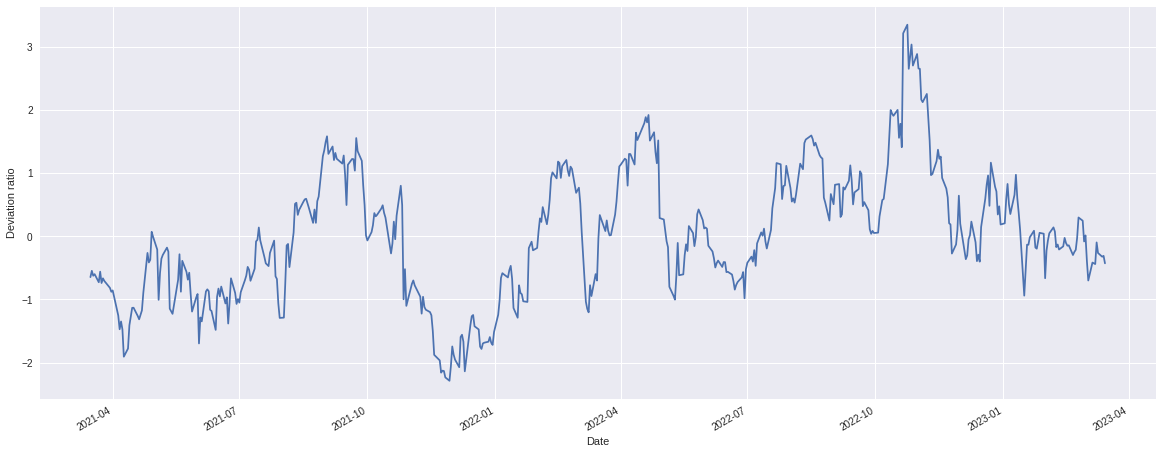

In [ ]:
def plot_deviation(Bank1,Bank2):
  df=data_sheet[[Bank1,Bank2]]
  df.columns = ['Col1', 'Col2']
  df=df.dropna()
  model = smf.ols(formula='Col1 ~ Col2', data=df).fit()
  std_err=st.stdev(model.resid)
  residuals=[x/std_err for x in model.resid]
  df['resid'] = residuals
  plt.style.use('seaborn')
  df['resid'].plot(figsize=(20,8))
  plt.ylabel("Deviation ratio")
  plt.show()
  
plot_deviation('AXISBANK.BO','PNB.NS')

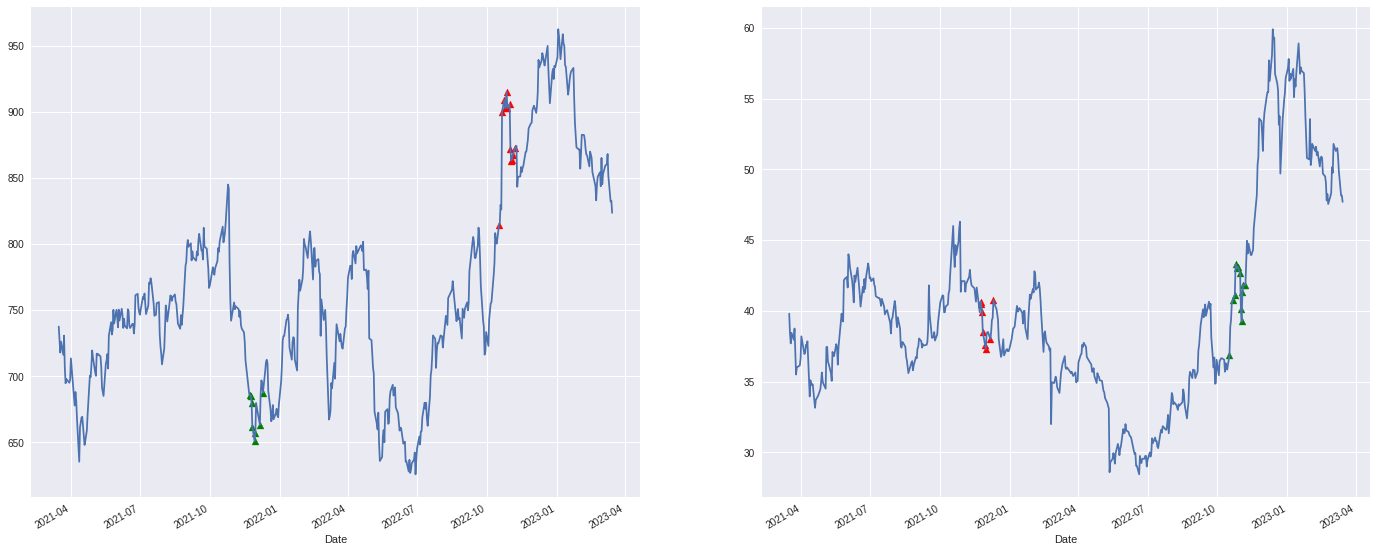

In [ ]:
def trade_signals(Bank1,Bank2):
  df=data_sheet[[Bank1,Bank2]]
  df.columns = ['Col1', 'Col2']
  df=df.dropna()
  model = smf.ols(formula='Col1 ~ Col2', data=df).fit()
  std_err=st.stdev(model.resid)
  plt.subplot(1, 2, 1)
  ax1=df['Col1'].plot(figsize=(24,10))
  plt.subplot(1, 2, 2)
  ax2=df['Col2'].plot(figsize=(24,10))
  for i in range(0, len(df['Col1'])):
    x1=df['Col1'][i]
    x2=df['Col2'][i]
    if model.resid[i]/std_err >= 2:
      ax1.scatter(df.index[i].strftime("%m-%d-%y"),x1,color='red',marker='^')
      ax2.scatter(df.index[i].strftime("%m-%d-%y"),x2,color='green',marker='^')  
    elif model.resid[i]/std_err <= -2:
      ax1.scatter(df.index[i].strftime("%m-%d-%y"),x1,color='green',marker='^')
      ax2.scatter(df.index[i].strftime("%m-%d-%y"),x2,color='red',marker='^')

trade_signals('AXISBANK.BO','PNB.NS')

[*********************100%***********************]  2 of 2 completed


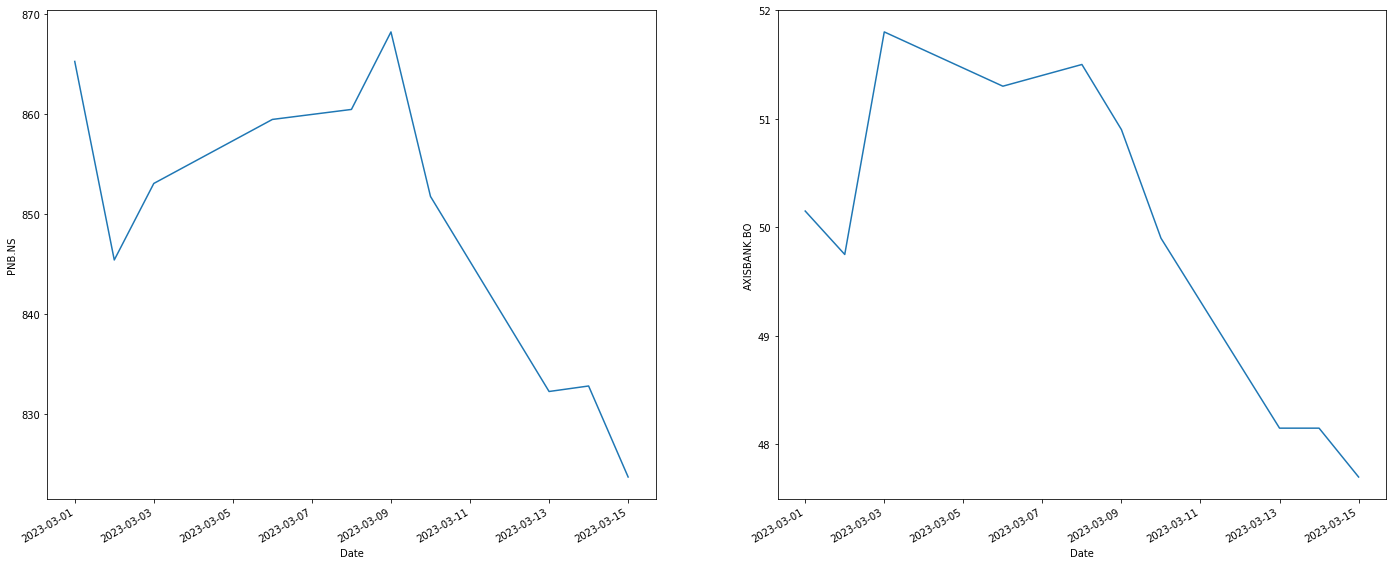

In [19]:
def trade_tracker(opening_residual,Bank1,Bank2,marketPrice_Bank1,marketPrice_Bank2):
     df=data_sheet[[Bank1,Bank2]]
     df.columns = ['Col1', 'Col2']
     df=df.dropna()
     model = smf.ols(formula='Col1 ~ Col2', data=df).fit()
     std_err=st.stdev(model.resid)
     deviation=model.resid[-1]/std_err
     if deviation >= 3.5:
       print("Stoploss trigerred")
       print("Approximate loss : Rs.{} per lot".format(abs(model.resid[-1]-opening_residual)))
     elif deviation>=3:
       print("Soft Stoploss trigerred")
       print("Approximate loss : Rs.{} per lot".format(abs(model.resid[-1]-opening_residual)))
     elif deviation==1:
       print("Target achieved")
       print("Approximate profit : Rs.{} per lot".format(abs(model.resid[-1]-opening_residual)))
     elif deviation==-1:
       print("Target achieved")
       print("Approximate profit : Rs.{} per lot".format(abs(model.resid[-1]-opening_residual)))
     elif deviation <=-3:
       print("Soft Stoploss trigerred")
       print("Approximate loss : Rs.{} per lot".format(abs(model.resid[-1]-opening_residual)))
     elif deviation <= -3.5:
       print("Stoploss trigerred")
       print("Approximate loss : Rs.{} per lot".format(abs(model.resid[-1]-opening_residual)))

opening_date="2023-3-1"
opening_residual=-8.551737147691938
banks = ['PNB.NS','AXISBANK.BO']
df = pdr.get_data_yahoo(banks,opening_date,date.today())['Close']
df= df.dropna()
plt.subplot(1, 2, 1)
df['AXISBANK.BO'].plot(figsize=(24,10))
plt.ylabel(banks[0])
plt.subplot(1, 2, 2)
df['PNB.NS'].plot(figsize=(24,10))
plt.ylabel(banks[1])
trade_tracker(opening_residual,banks[0],banks[-1],df[banks[0]].iloc[-1],df[banks[1]].iloc[-1])